In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
warnings.filterwarnings('ignore')

In [6]:
df_app = pd.read_csv('credit_risk_applicants.csv')
print(f"Applicants data loaded: {df_app.shape[0]} rows, {df_app.shape[1]} columns")

Applicants data loaded: 307511 rows, 122 columns


In [7]:
df_prev = pd.read_csv('credit_risk_previous_loans.csv')
print(f"Previous loans data loaded: {df_prev.shape[0]} rows, {df_prev.shape[1]} columns")

Previous loans data loaded: 1670214 rows, 37 columns


In [10]:
df_meta = pd.read_csv('credit_risk_metadata.csv', encoding='latin1')
print(f"Metadata loaded: {df_meta.shape[0]} rows")

Metadata loaded: 160 rows


In [12]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [15]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [16]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [20]:
## Check target variable distribution
target_counts = df_app['TARGET'].value_counts()
print(target_counts)

TARGET
0    282686
1     24825
Name: count, dtype: int64


In [21]:
print(f"\nDefault Rate: {(target_counts[1] / len(df_app) * 100):.2f}%")


Default Rate: 8.07%


Missing Values & Duplicates

In [33]:
print("\n" + "=" * 80)
print("APPLICANTS DATASET — DATA QUALITY CHECK")
print("=" * 80)

# Missing values
app_missing = df_app.isnull().sum().to_frame('Missing_Count')
app_missing['Percentage'] = (app_missing['Missing_Count'] / len(df_app)) * 100
app_missing = app_missing[app_missing['Missing_Count'] > 0] \
                          .sort_values('Percentage', ascending=False)

print(f"\nColumns with missing values: {len(app_missing)}")
print("\nTop 10 columns with most missing values:")
print(app_missing.head(10))

# Duplicate rows
print("\nDuplicate rows:", df_app.duplicated().sum())



APPLICANTS DATASET — DATA QUALITY CHECK

Columns with missing values: 67

Top 10 columns with most missing values:
                          Missing_Count  Percentage
COMMONAREA_MEDI                  214865   69.872297
COMMONAREA_AVG                   214865   69.872297
COMMONAREA_MODE                  214865   69.872297
NONLIVINGAPARTMENTS_MEDI         213514   69.432963
NONLIVINGAPARTMENTS_MODE         213514   69.432963
NONLIVINGAPARTMENTS_AVG          213514   69.432963
FONDKAPREMONT_MODE               210295   68.386172
LIVINGAPARTMENTS_MODE            210199   68.354953
LIVINGAPARTMENTS_MEDI            210199   68.354953
LIVINGAPARTMENTS_AVG             210199   68.354953

Duplicate rows: 0


In [34]:
print("\n" + "=" * 80)
print("PREVIOUS LOANS DATASET — DATA QUALITY CHECK")
print("=" * 80)

# Missing values
prev_missing = df_prev.isnull().sum().to_frame('Missing_Count')
prev_missing['Percentage'] = (prev_missing['Missing_Count'] / len(df_prev)) * 100
prev_missing = prev_missing[prev_missing['Missing_Count'] > 0] \
                            .sort_values('Percentage', ascending=False)

print(f"\nColumns with missing values: {len(prev_missing)}")
print("\nTop 10 columns with most missing values:")
print(prev_missing.head(10))

# Duplicate rows
print("\nDuplicate rows:", df_prev.duplicated().sum())



PREVIOUS LOANS DATASET — DATA QUALITY CHECK

Columns with missing values: 16

Top 10 columns with most missing values:
                           Missing_Count  Percentage
RATE_INTEREST_PRIMARY            1664263   99.643698
RATE_INTEREST_PRIVILEGED         1664263   99.643698
AMT_DOWN_PAYMENT                  895844   53.636480
RATE_DOWN_PAYMENT                 895844   53.636480
NAME_TYPE_SUITE                   820405   49.119754
DAYS_FIRST_DRAWING                673065   40.298129
DAYS_FIRST_DUE                    673065   40.298129
DAYS_LAST_DUE_1ST_VERSION         673065   40.298129
DAYS_LAST_DUE                     673065   40.298129
DAYS_TERMINATION                  673065   40.298129

Duplicate rows: 0


DATA CLEANING

In [28]:

# Create a copy for cleaning
df = df_app.copy()


In [29]:
# Fix DAYS_EMPLOYED anomaly
df['DAYS_EMPLOYED_ANOM'] = (df['DAYS_EMPLOYED'] == 365243)
df.loc[df['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = np.nan

In [31]:
# Create age and employment years
df['AGE_YEARS'] = -(df['DAYS_BIRTH'] / 365)
df['YEARS_EMPLOYED'] = -(df['DAYS_EMPLOYED'] / 365)

In [35]:
# Drop columns with more than 50% missing
cols_to_drop = app_missing[app_missing['Percentage'] > 50].index
df.drop(columns=cols_to_drop, inplace=True)

In [36]:
# Fill missing values (numeric)
for col in df.select_dtypes('number').columns:
    df[col].fillna(df[col].median(), inplace=True)


In [37]:
# Fill missing values (categorical)
for col in df.select_dtypes('object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [38]:

print("Clean Dataset Shape:", df.shape)

Clean Dataset Shape: (307511, 84)


In [76]:
# optional

print("\n[5.4] Outlier Detection (Simple IQR Method)")

# ---- AMT_INCOME_TOTAL ----
Q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers_income = df[(df['AMT_INCOME_TOTAL'] < lower) | (df['AMT_INCOME_TOTAL'] > upper)]
print(f"AMT_INCOME_TOTAL Outliers: {len(outliers_income)}  (Range: {lower:.0f} to {upper:.0f})")

# ---- AMT_CREDIT ----
Q1 = df['AMT_CREDIT'].quantile(0.25)
Q3 = df['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers_credit = df[(df['AMT_CREDIT'] < lower) | (df['AMT_CREDIT'] > upper)]
print(f"AMT_CREDIT Outliers: {len(outliers_credit)}  (Range: {lower:.0f} to {upper:.0f})")

# ---- AGE_YEARS ----
Q1 = df['AGE_YEARS'].quantile(0.25)
Q3 = df['AGE_YEARS'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers_age = df[(df['AGE_YEARS'] < lower) | (df['AGE_YEARS'] > upper)]
print(f"AGE_YEARS Outliers: {len(outliers_age)}  (Range: {lower:.0f} to {upper:.0f})")

print("\nOutlier Detection Completed!")



[5.4] Outlier Detection (Simple IQR Method)
AMT_INCOME_TOTAL Outliers: 14035  (Range: -22500 to 337500)
AMT_CREDIT Outliers: 6562  (Range: -537975 to 1616625)
AGE_YEARS Outliers: 0  (Range: 4 to 84)

Outlier Detection Completed!


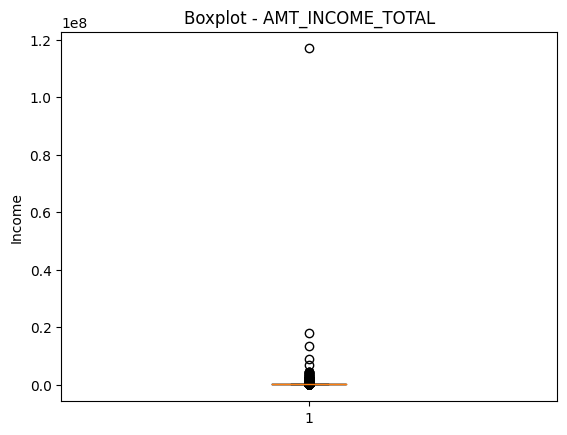

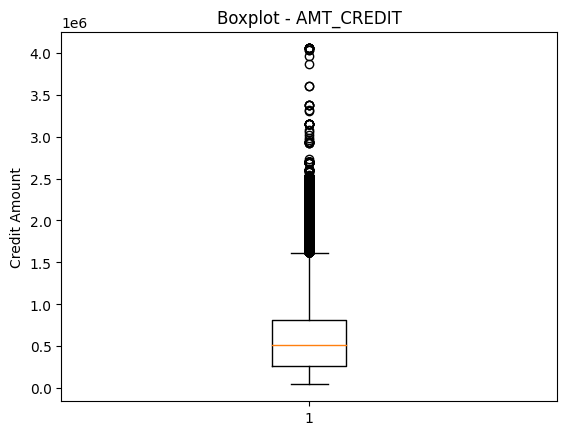

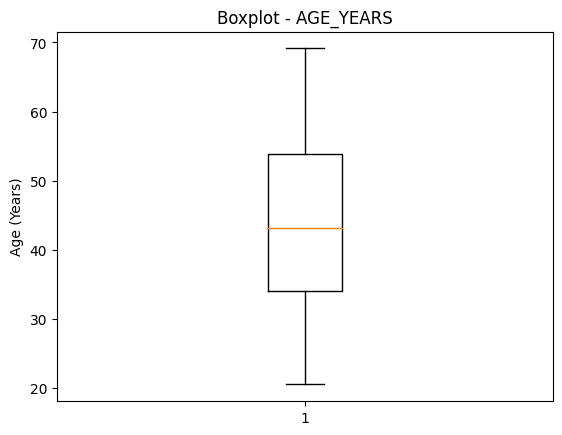

In [77]:
# Boxplot for AMT_INCOME_TOTAL
plt.boxplot(df['AMT_INCOME_TOTAL'].dropna())
plt.title("Boxplot - AMT_INCOME_TOTAL")
plt.ylabel("Income")
plt.show()

# Boxplot for AMT_CREDIT
plt.boxplot(df['AMT_CREDIT'].dropna())
plt.title("Boxplot - AMT_CREDIT")
plt.ylabel("Credit Amount")
plt.show()

# Boxplot for AGE_YEARS
plt.boxplot(df['AGE_YEARS'].dropna())
plt.title("Boxplot - AGE_YEARS")
plt.ylabel("Age (Years)")
plt.show()


UNIVARIATE EDA

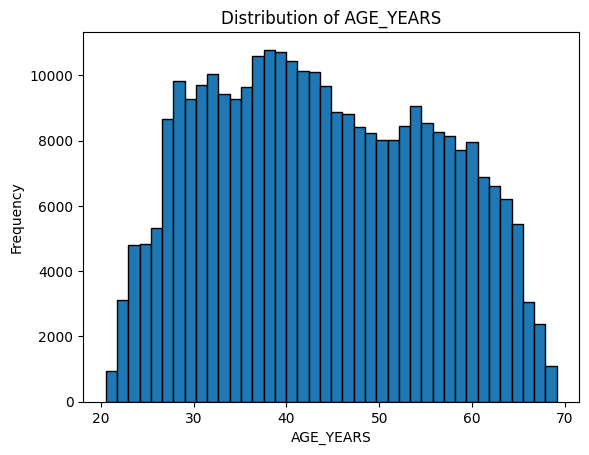

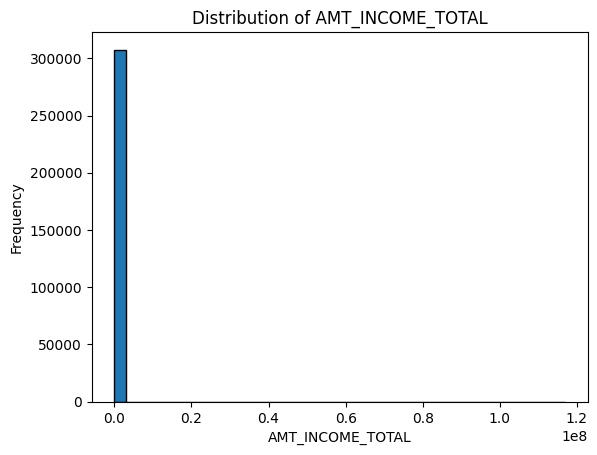

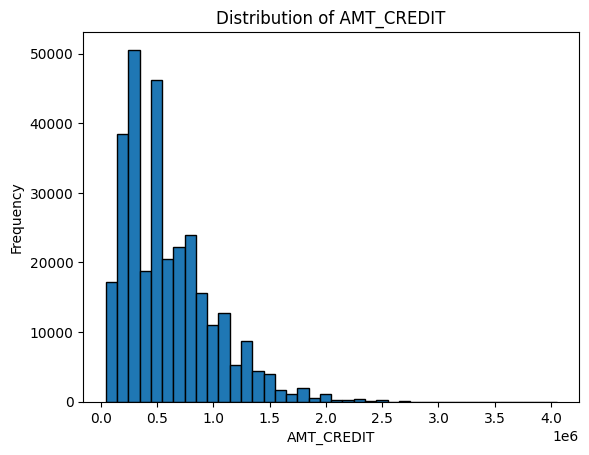

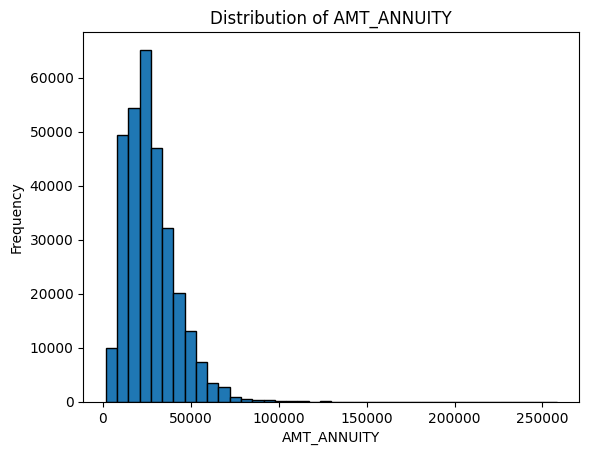

In [ ]:
#Numerical Columns (Histograms)
num_cols = ['AGE_YEARS', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

for col in num_cols:
    plt.hist(df[col], bins=40, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("Frequency")
    plt.show()


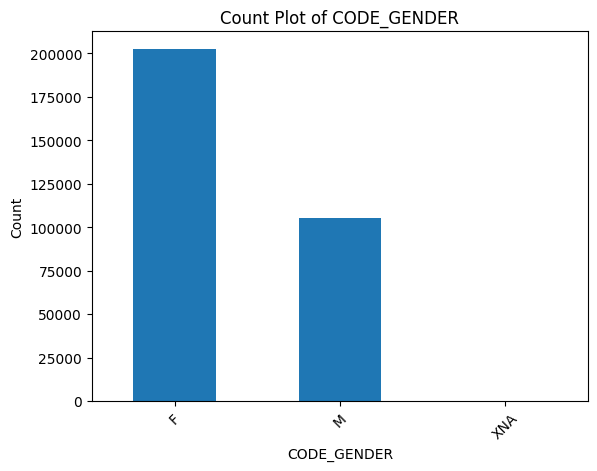

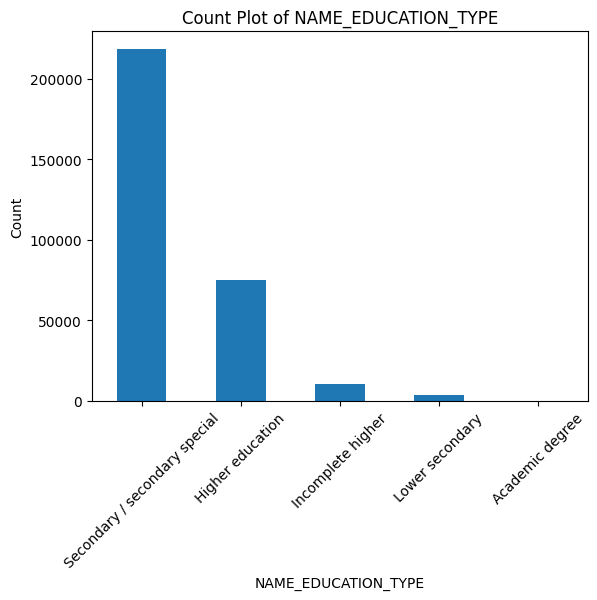

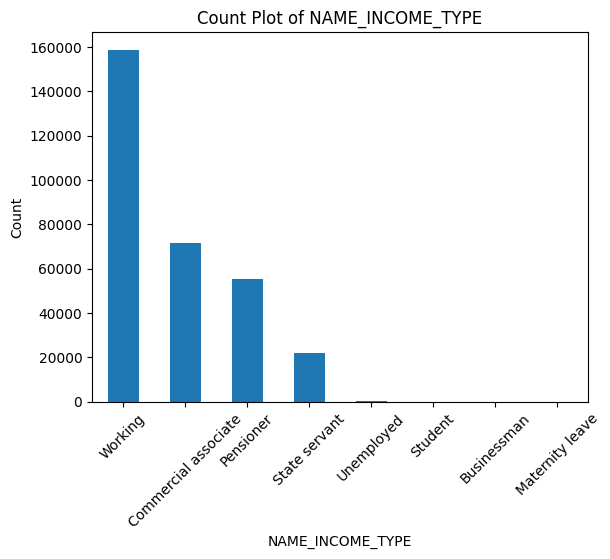

In [ ]:
#Categorical Columns (Bar Plots)

cat_cols = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']

for col in cat_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


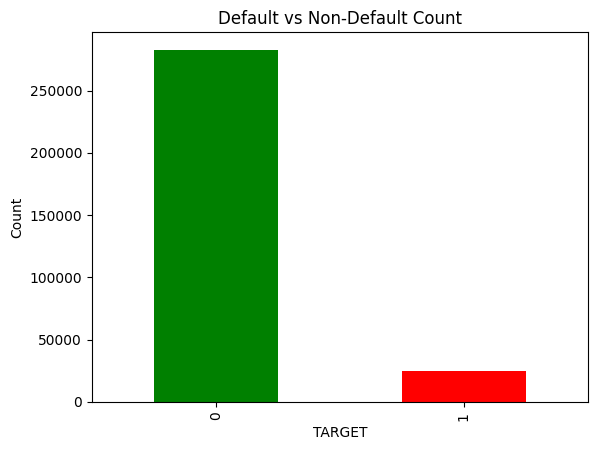

In [41]:
# TARGET Distribution
df['TARGET'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Default vs Non-Default Count")
plt.xlabel("TARGET"); plt.ylabel("Count")
plt.show()


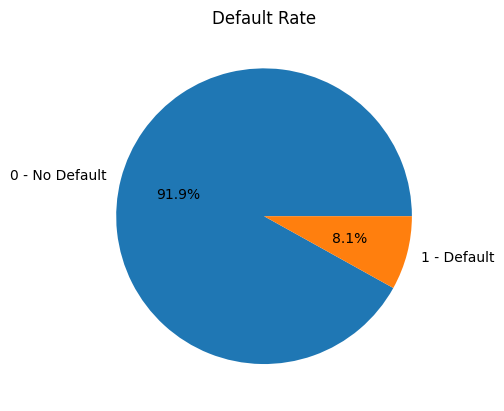

In [78]:
# Pie chart
df['TARGET'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['0 - No Default','1 - Default'])
plt.title("Default Rate")
plt.ylabel("")
plt.show()

Bivariate EDA

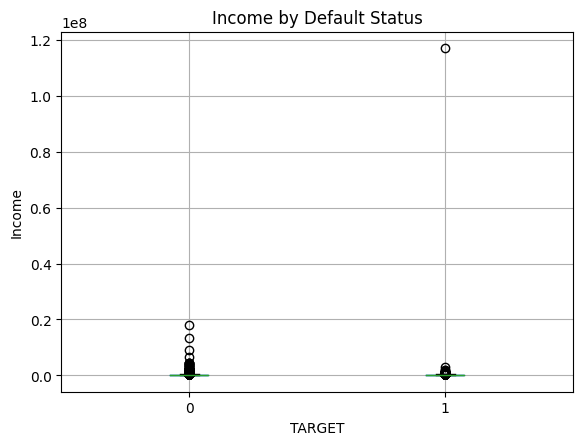

In [79]:
# Income vs Default (Boxplot)
df.boxplot(column='AMT_INCOME_TOTAL', by='TARGET')
plt.title("Income by Default Status")
plt.suptitle("")
plt.xlabel("TARGET")
plt.ylabel("Income")
plt.show()



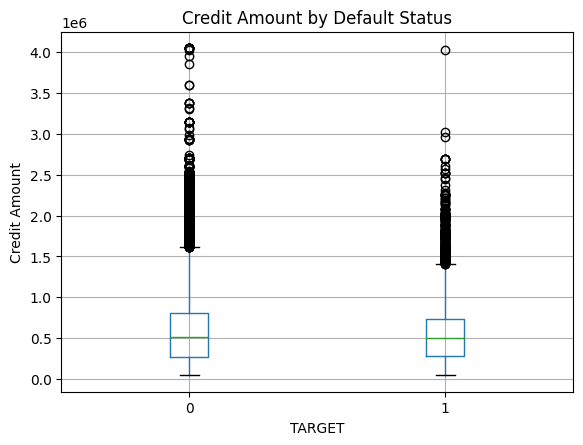

In [80]:
#Credit Amount vs Default (Boxplot)
df.boxplot(column='AMT_CREDIT', by='TARGET')
plt.title("Credit Amount by Default Status")
plt.suptitle("")
plt.xlabel("TARGET")
plt.ylabel("Credit Amount")
plt.show()


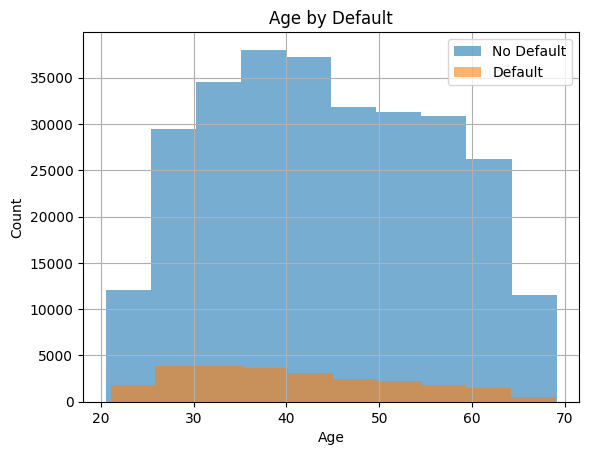

In [43]:
# Age vs Default (Histogram)
df[df.TARGET==0]['AGE_YEARS'].hist(alpha=0.6, label='No Default')
df[df.TARGET==1]['AGE_YEARS'].hist(alpha=0.6, label='Default')
plt.legend()
plt.title("Age by Default")
plt.xlabel("Age"); plt.ylabel("Count")
plt.show()


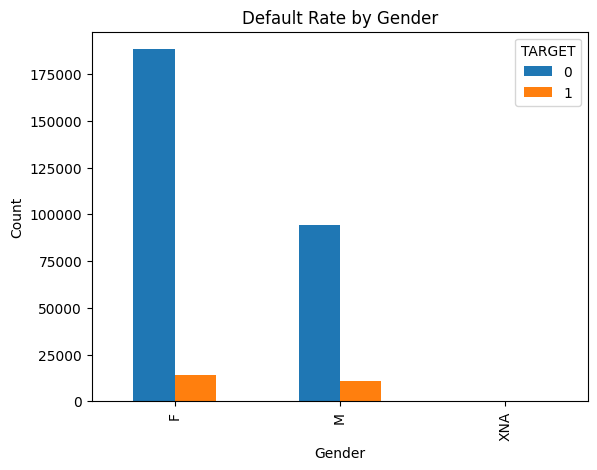

In [82]:
# Gender vs Default (Bar Chart)
pd.crosstab(df['CODE_GENDER'], df['TARGET']).plot(kind='bar')
plt.title("Default Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


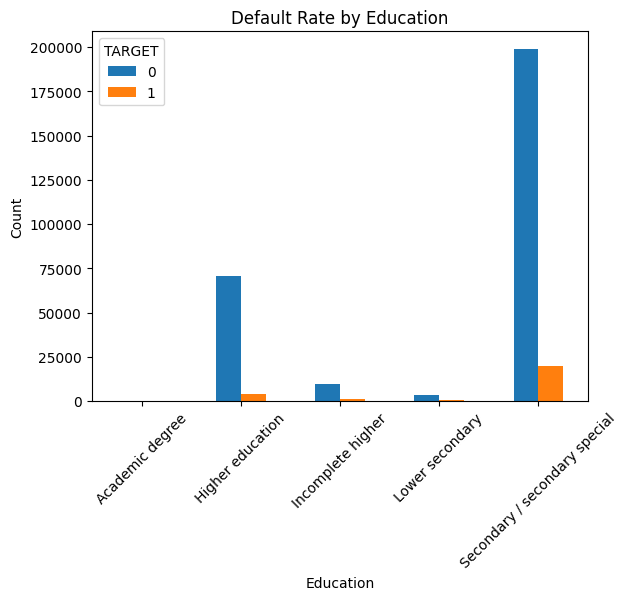

In [83]:
# Education vs Default
pd.crosstab(df['NAME_EDUCATION_TYPE'], df['TARGET']).plot(kind='bar')
plt.title("Default Rate by Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


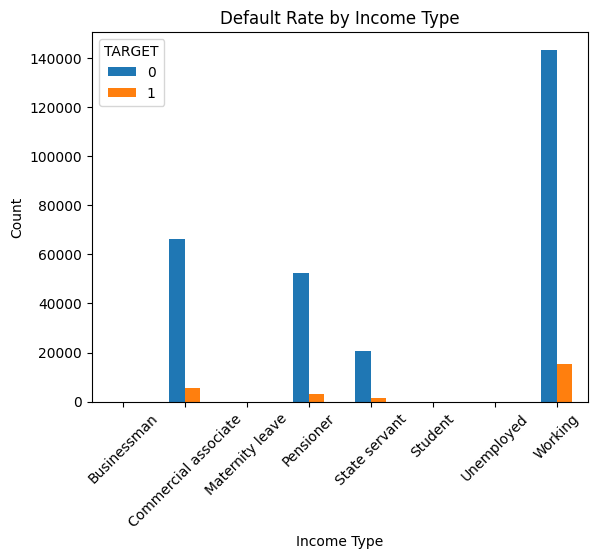

In [84]:
# Income Type vs Default
pd.crosstab(df['NAME_INCOME_TYPE'], df['TARGET']).plot(kind='bar')
plt.title("Default Rate by Income Type")
plt.xlabel("Income Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


CORRELATION HEATMAP

In [47]:
# Correlation Heatmap (Top 15 Variables)
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Get top 15 correlations with TARGET
top_corr = corr['TARGET'].abs().sort_values(ascending=False).head(15)
top_corr

TARGET                         1.000000
EXT_SOURCE_2                   0.160295
EXT_SOURCE_3                   0.155892
AGE_YEARS                      0.078239
DAYS_BIRTH                     0.078239
YEARS_EMPLOYED                 0.063368
DAYS_EMPLOYED                  0.063368
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

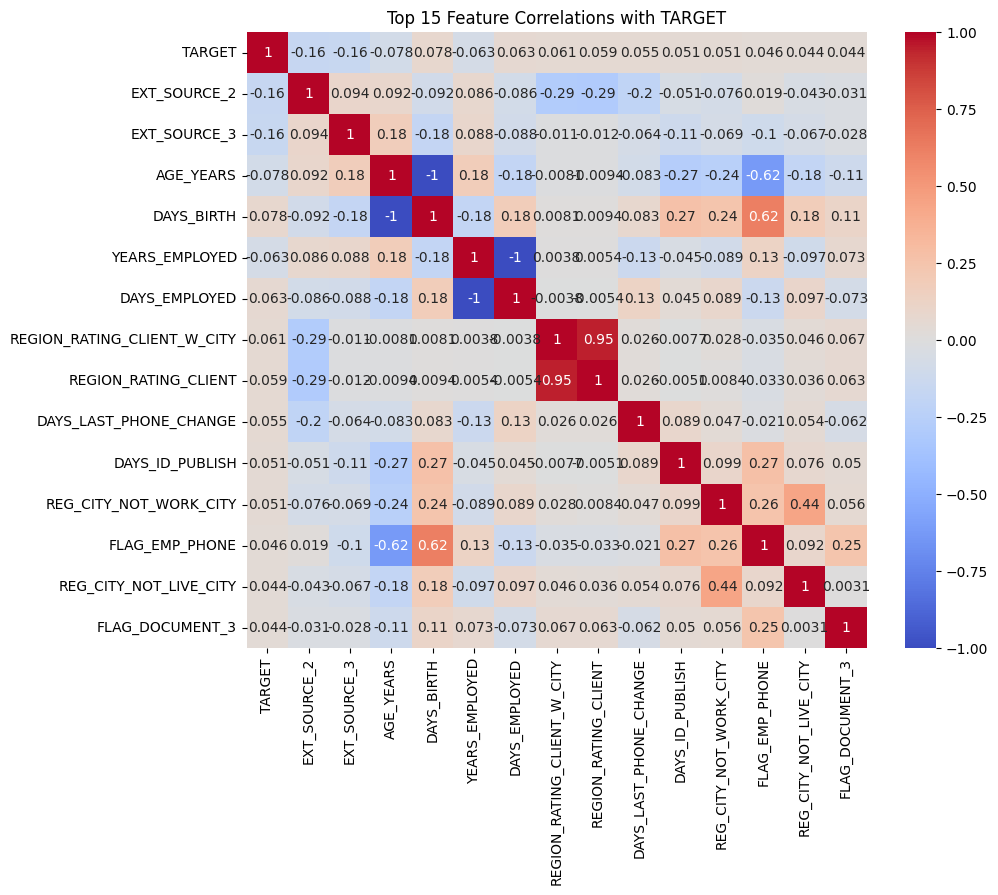

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(corr.loc[top_corr.index, top_corr.index], annot=True, cmap='coolwarm')
plt.title("Top 15 Feature Correlations with TARGET")
plt.show()


In [49]:
df_prev_simple = df_prev[['SK_ID_CURR','NAME_CONTRACT_STATUS','SK_ID_PREV']]

In [50]:
# Count previous loans & refusals
prev_summary = df_prev_simple.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV':'count',
    'NAME_CONTRACT_STATUS': lambda x: (x=='Refused').sum()
}).rename(columns={'SK_ID_PREV':'PREV_COUNT',
                   'NAME_CONTRACT_STATUS':'PREV_REFUSED'})


In [51]:
# Merge into main dataset
df = df.merge(prev_summary, on='SK_ID_CURR', how='left')
df[['PREV_COUNT','PREV_REFUSED']] = df[['PREV_COUNT','PREV_REFUSED']].fillna(0)

print(df[['PREV_COUNT','PREV_REFUSED']].head())

   PREV_COUNT  PREV_REFUSED
0         1.0           0.0
1         3.0           0.0
2         1.0           0.0
3         9.0           1.0
4         6.0           0.0


HYPOTHESIS TESTING

In [71]:
# T-Test: Income (Default vs Non-default)

'''

'''
print("\nH0: Mean income of defaulters = Mean income of non-defaulters")
print("H1: Mean income of defaulters ≠ Mean income of non-defaulters")

g0 = df[df.TARGET==0]['AMT_INCOME_TOTAL'].dropna()
g1 = df[df.TARGET==1]['AMT_INCOME_TOTAL'].dropna()

t,p = ttest_ind(g0, g1)

print(f"\nMean Income (No default):{g0.mean():.2f}")
print(f"Mean Income (default):{g1.mean():.2f}")
print("T-statistic:",t)
print("Income T-test p-value:", p)

if p < 0.05:
    print("CONCLUSION: Reject H0. There IS a significant difference in income.")
else:
    print("CONCLUSION: Fail to reject H0. No significant difference in income.")



H0: Mean income of defaulters = Mean income of non-defaulters
H1: Mean income of defaulters ≠ Mean income of non-defaulters

Mean Income (No default):169077.72
Mean Income (default):165611.76
T-statistic: 2.2081011084695983
Income T-test p-value: 0.027237960879677118
CONCLUSION: Reject H0. There IS a significant difference in income.


In [70]:
# Chi-Square: Gender vs Default

table = pd.crosstab(df['CODE_GENDER'], df['TARGET'])
print(table)


print("\nH0: Gender and default are independent")
print("H1: Gender and default are related")

chi, p, dof, exp = chi2_contingency(table)

print(f"\nChi-square statistic: {chi:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("CONCLUSION: Reject H0. Gender and default ARE related.")
else:
    print("CONCLUSION: Fail to reject H0. Gender and default are independent.")


TARGET            0      1
CODE_GENDER               
F            188278  14170
M             94404  10655
XNA               4      0

H0: Gender and default are independent
H1: Gender and default are related

Chi-square statistic: 920.7913
P-value: 0.0000
Degrees of freedom: 2
CONCLUSION: Reject H0. Gender and default ARE related.


In [69]:
# CHI-SQUARE TEST: Education vs Default

table = pd.crosstab(df['NAME_EDUCATION_TYPE'], df['TARGET'])
print(table)

print("\nH0: Education and default are independent")
print("H1: Education and default are related")

chi2, p_value, dof, expected = chi2_contingency(table)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
    
if p_value < 0.05:
    print("CONCLUSION: Reject H0. Education and default ARE related.")
else:
    print("CONCLUSION: Fail to reject H0. Education and default are independent.")

TARGET                              0      1
NAME_EDUCATION_TYPE                         
Academic degree                   161      3
Higher education                70854   4009
Incomplete higher                9405    872
Lower secondary                  3399    417
Secondary / secondary special  198867  19524

H0: Education and default are independent
H1: Education and default are related

Chi-square statistic: 1019.2132
P-value: 0.0000
Degrees of freedom: 4
CONCLUSION: Reject H0. Education and default ARE related.


In [72]:
# ANOVA: Age vs Income Types

print("H0: Mean age is the same across all income types")
print("H1: At least one income type has different mean age")

groups = [group['AGE_YEARS'].dropna() for name, group in df.groupby('NAME_INCOME_TYPE')]
f, p = f_oneway(*groups)

print(f"\nF-statistic: {f:.4f}")
print(f"P-value: {p:.4f}")
    
if p_value < 0.05:
    print("CONCLUSION: Reject H0. At least one income type has significantly different age.")
else:
    print("CONCLUSION: Fail to reject H0. No significant age difference across income types.")


H0: Mean age is the same across all income types
H1: At least one income type has different mean age

F-statistic: 27488.8141
P-value: 0.0000
CONCLUSION: Reject H0. At least one income type has significantly different age.


In [73]:
# T-TEST: Credit amount difference
print("H0: Mean credit amount of defaulters = Mean credit amount of non-defaulters")
print("H1: Mean credit amount of defaulters ≠ Mean credit amount of non-defaulters")

if 'AMT_CREDIT' in df.columns:
    credit_no_default = df[df['TARGET'] == 0]['AMT_CREDIT'].dropna()
    credit_default = df[df['TARGET'] == 1]['AMT_CREDIT'].dropna()
    
    t_stat, p_value = ttest_ind(credit_no_default, credit_default)
    
    print(f"\nMean Credit (No Default): ${credit_no_default.mean():,.2f}")
    print(f"Mean Credit (Default): ${credit_default.mean():,.2f}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("CONCLUSION: Reject H0. There IS a significant difference in credit amount.")
    else:
        print("CONCLUSION: Fail to reject H0. No significant difference in credit amount.")

H0: Mean credit amount of defaulters = Mean credit amount of non-defaulters
H1: Mean credit amount of defaulters ≠ Mean credit amount of non-defaulters

Mean Credit (No Default): $602,648.28
Mean Credit (Default): $557,778.53
T-statistic: 16.8486
P-value: 0.0000
CONCLUSION: Reject H0. There IS a significant difference in credit amount.


In [74]:
# Proportion Test: Default Rate vs 10% Benchmark

print("H0: Company default rate = Industry benchmark (assume 10%)")
print("H1: Company default rate ≠ Industry benchmark")

obs = df['TARGET'].mean() # observed default rate
n = len(df) 
p0 = 0.10   # industry benchmark 10% 

## Z-test for proportions
z = (obs - p0) / np.sqrt((p0*(1-p0))/n)
p_val = 2*(1 - stats.norm.cdf(abs(z)))

print(f"\nObserved Default Rate: {obs:.2%}")
print(f"Industry Benchmark: {p0:.2%}")
print(f"Z-statistic: {z:.4f}")
print(f"P-value: {p:.4f}")

if p_value < 0.05:
    print("CONCLUSION: Reject H0. Company default rate is significantly different from benchmark.")
else:
    print("CONCLUSION: Fail to reject H0. Company default rate is similar to benchmark.")


H0: Company default rate = Industry benchmark (assume 10%)
H1: Company default rate ≠ Industry benchmark

Observed Default Rate: 8.07%
Industry Benchmark: 10.00%
Z-statistic: -35.6219
P-value: 0.0000
CONCLUSION: Reject H0. Company default rate is significantly different from benchmark.
